Group Number: 6

Exploring the socio-economic factors that affect a country's Life Expectancy

Principal Investigators: Muzi Li (mli737@wisc.edu), Evelyn Tan(ztan75@wisc.edu),  Kshitij Galav(galav@wisc.edu)


In [4]:
#Importing necessary packages to be used
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Load data, ensuring ".." values are set as NaN when loaded
#Data source: https://databank.worldbank.org/source/world-development-indicators
data = pd.read_csv("data/LifeExpectancyData.csv", na_values="..")

In [6]:
#Rename columns to allow ease in understanding and usage
data = data.rename(columns={'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]': 'Life_Expectancy',
                            'Current health expenditure per capita (current US$) [SH.XPD.CHEX.PC.CD]': 'Health_Expend_Per_Capita',
                            'Country Name':'Country',
                            'Time':'Year',
                            'GDP per capita (current US$) [NY.GDP.PCAP.CD]':'GDP_Per_Capita',
                            'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative) [SE.PRM.CUAT.ZS]':'Primary_Education_Attainment_Percent'})

In [7]:
#Changing string columns to floats
data['Life_Expectancy'] = data['Life_Expectancy'].astype(float)
data['Health_Expend_Per_Capita'] = data['Health_Expend_Per_Capita'].astype(float)
data['GDP_Per_Capita'] = data['GDP_Per_Capita'].astype(float)
data['Primary_Education_Attainment_Percent'] = data['Primary_Education_Attainment_Percent'].astype(float)

In [8]:
#Obtaining basic view of the dataset with one country from each region of the world for 2019 by extracting from the data dataframe
#Seven different regions: East Asia & Pacific, Europe & Central Asia, Latin America & Caribbean, Middle East & North Africa, North America,
#South Asia, Sub-Saharan Africa
country_from_each_region_2019 = data[(data["Year"]==2019)]
country_from_each_region_2019 = country_from_each_region_2019[country_from_each_region_2019["Country"].isin(['Philippines', 'Nigeria', 'Pakistan', 'Cuba', 'United Arab Emirates',
                                                                            'Brazil', 'Belarus'])][["Country", "Life_Expectancy",
                                                                                                    "Health_Expend_Per_Capita", "GDP_Per_Capita",
                                                                                                    "Primary_Education_Attainment_Percent"]]
country_from_each_region_2019.reset_index(drop=True)

,Country,Life_Expectancy,Health_Expend_Per_Capita,GDP_Per_Capita,Primary_Education_Attainment_Percent
0,Belarus,74.226829,390.249725,6837.767232,99.788551
1,Brazil,75.338000,850.432861,8845.323931,84.080002
2,Cuba,77.611000,1013.101379,9139.415856,91.949478
3,Nigeria,52.910000,69.681480,2334.023543,65.057838
4,Pakistan,66.756000,37.224613,1437.165834,49.554680
5,Philippines,71.865000,142.236649,3413.849067,82.394142
6,United Arab Emirates,79.726000,1947.130737,45376.170839,92.996536


In [9]:
#Global yearly mean values of parameters calculated by grouping by Year column
mean_parameters_by_year = data.groupby('Year')[['Life_Expectancy', 'Health_Expend_Per_Capita', 'GDP_Per_Capita',
                                                'Primary_Education_Attainment_Percent']].mean().reset_index()

In [10]:
#Rename columns to accurately represent the data
mean_parameters_by_year = mean_parameters_by_year.rename(columns={'Life_Expectancy': 'Mean_Life_Expectancy',
                            'Health_Expend_Per_Capita': 'Mean_Health_Expend_Per_Capita',
                            'GDP_Per_Capita': 'Mean_GDP_Per_Capita',
                            'Primary_Education_Attainment_Percent':'Mean_Primary_Education_Attainment_Percent'})

In [11]:
#Basic view of the dataset with mean parameters of each year
mean_parameters_by_year

,Year,Mean_Life_Expectancy,Mean_Health_Expend_Per_Capita,Mean_GDP_Per_Capita,Mean_Primary_Education_Attainment_Percent
0,2000,67.358588,439.807774,8293.549537,75.574884
1,2001,67.663336,449.536363,8269.603771,73.250280
2,2002,67.928447,487.652825,8914.955974,68.827649
3,2003,68.227456,581.308756,10280.135700,75.206248
4,2004,68.591499,664.593865,11742.255077,74.822454
5,2005,68.897906,715.562793,12709.614740,78.601216
6,2006,69.249848,760.063013,14245.812651,74.035174
7,2007,69.554080,865.612118,16246.501661,78.949047
8,2008,69.885981,970.618781,17346.895948,80.464110
9,2009,70.273578,948.624936,15441.515565,81.261528


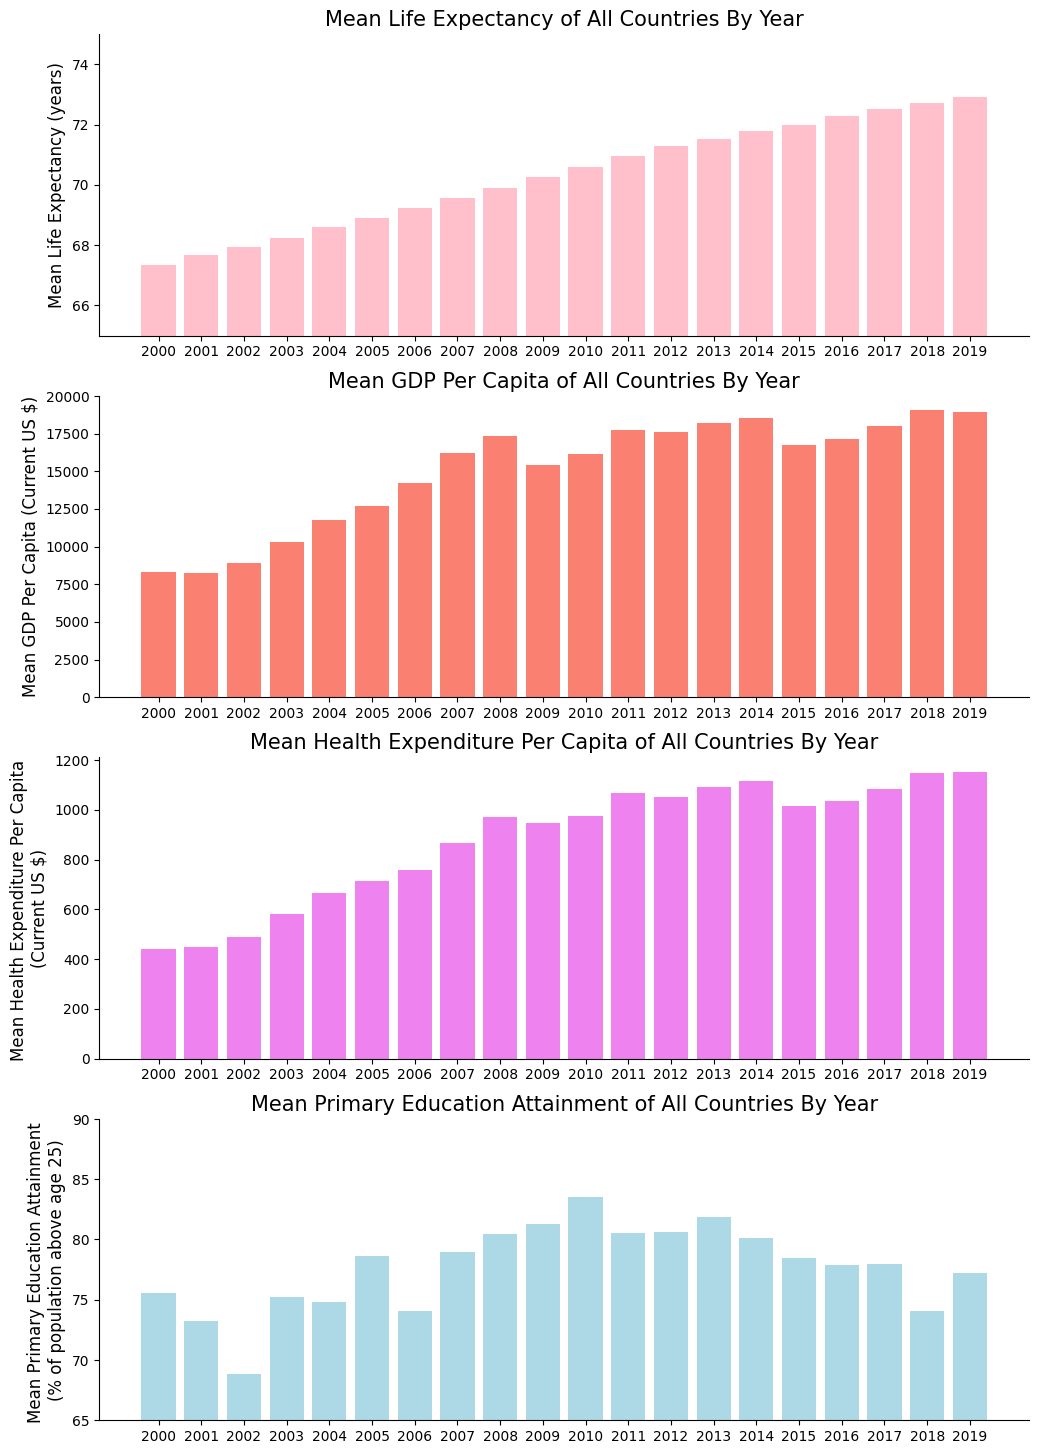

In [12]:
#Plotting parameters of global yearly mean values to visually represent global trends
fig, ax = plt.subplots(4,1,figsize=(12,18))

ax[0].bar(mean_parameters_by_year['Year'], mean_parameters_by_year['Mean_Life_Expectancy'], color='pink')
ax[0].set_xticks(mean_parameters_by_year['Year'])
ax[0].set_ylim(65, 75)
ax[0].set_xticklabels(mean_parameters_by_year['Year'])
ax[0].set_ylabel('Mean Life Expectancy (years)',fontsize=12)
ax[0].set_title('Mean Life Expectancy of All Countries By Year',fontsize=15)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False);

ax[1].bar(mean_parameters_by_year['Year'], mean_parameters_by_year['Mean_GDP_Per_Capita'], color='salmon')
ax[1].set_xticks(mean_parameters_by_year['Year'])
ax[1].set_xticklabels(mean_parameters_by_year['Year'])
ax[1].set_ylabel('Mean GDP Per Capita (Current US $)',fontsize=12)
ax[1].set_title('Mean GDP Per Capita of All Countries By Year',fontsize=15)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False);

ax[2].bar(mean_parameters_by_year['Year'], mean_parameters_by_year['Mean_Health_Expend_Per_Capita'], color='violet')
ax[2].set_xticks(mean_parameters_by_year['Year'])
ax[2].set_xticklabels(mean_parameters_by_year['Year'])
ax[2].set_ylabel('Mean Health Expenditure Per Capita \n(Current US $)',fontsize=12)
ax[2].set_title('Mean Health Expenditure Per Capita of All Countries By Year',fontsize=15)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False);

ax[3].bar(mean_parameters_by_year['Year'], mean_parameters_by_year['Mean_Primary_Education_Attainment_Percent'], color='lightblue')
ax[3].set_xticks(mean_parameters_by_year['Year'])
ax[3].set_ylim(65, 90)
ax[3].set_xticklabels(mean_parameters_by_year['Year'])
ax[3].set_ylabel('Mean Primary Education Attainment \n(% of population above age 25)',fontsize=12)
ax[3].set_title('Mean Primary Education Attainment of All Countries By Year',fontsize=15)
ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False);

ax = plt.gca()

plt.savefig('one.svg', format='svg')

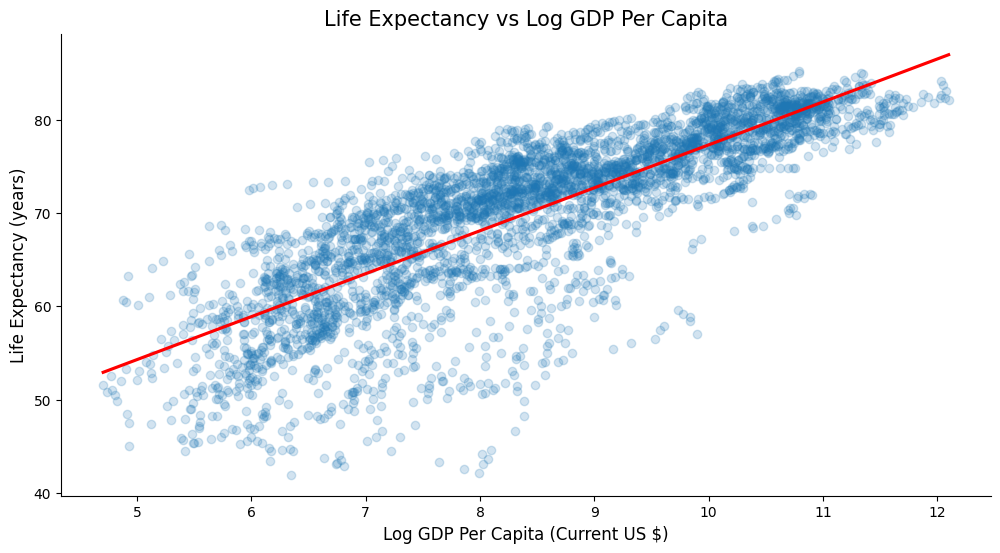

In [13]:
#Life Expectancy vs Log GDP Per Capita
#We make use of Log to avoid clustering of data which results due to GDP Per Capita numbers being considerably larger compared to Life Expectancy
data['Log_GDP_Per_Capita'] = np.log(data['GDP_Per_Capita'])
plt.subplots(figsize=(12,6))
sns.regplot(x='Log_GDP_Per_Capita', y='Life_Expectancy', data=data, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'}, ci=None)

plt.title("Life Expectancy vs Log GDP Per Capita",fontsize=15)
plt.ylabel("Life Expectancy (years)",fontsize=12)
plt.xlabel("Log GDP Per Capita (Current US $)",fontsize=12)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

plt.savefig('exp_gdp.svg', format='svg')

In [14]:
#Calculating slope of best-fit line

#Obtain data for best-fit line from the plot captured in the previous cell
bet_fit_line = ax.lines[0].get_xydata()

#Calculate slope of best-fit line using the formula for slope
best_fit_line_slope = (bet_fit_line[1, 1] - bet_fit_line[0, 1]) / (bet_fit_line[1, 0] - bet_fit_line[0, 0])

best_fit_line_slope

4.601138018185169

In [15]:
#Regression Analysis: Life Expectancy and Log GDP Per Capita

#Model examining relationship between Life Expectancy and Log GDP Per Capita
model = 'Life_Expectancy ~ Log_GDP_Per_Capita'
result = smf.ols(model, data=data).fit()

#As obtained p-value less than 0.05, we can conclude a statistically significant relationship
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     8062.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        05:42:35   Log-Likelihood:                -12299.
No. Observations:                4029   AIC:                         2.460e+04
Df Residuals:                    4027   BIC:                         2.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             31.2799      0

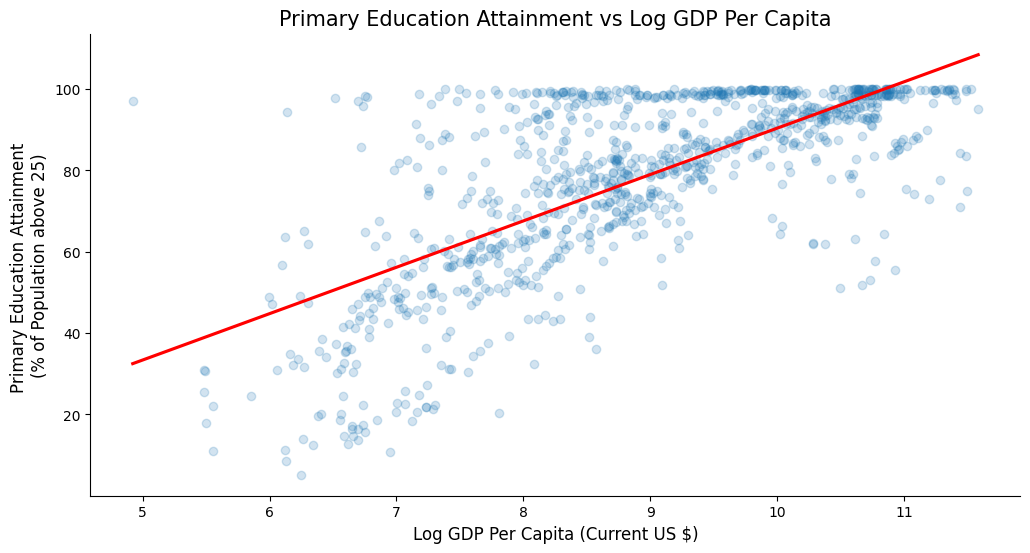

In [16]:
#Primary Education Attainment vs Log GDP Per Capita
#We make use of Log to avoid clustering of data which results due to GDP Per Capita numbers being considerably larger compared to
#Primary Education Attainment
plt.subplots(figsize=(12,6))
sns.regplot(x='Log_GDP_Per_Capita', y='Primary_Education_Attainment_Percent', data=data, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'}, ci=None)

plt.title("Primary Education Attainment vs Log GDP Per Capita",fontsize=15)
plt.ylabel("Primary Education Attainment \n(% of Population above 25)",fontsize=12)
plt.xlabel("Log GDP Per Capita (Current US $)",fontsize=12)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

plt.savefig('edu_gdp.svg', format='svg')

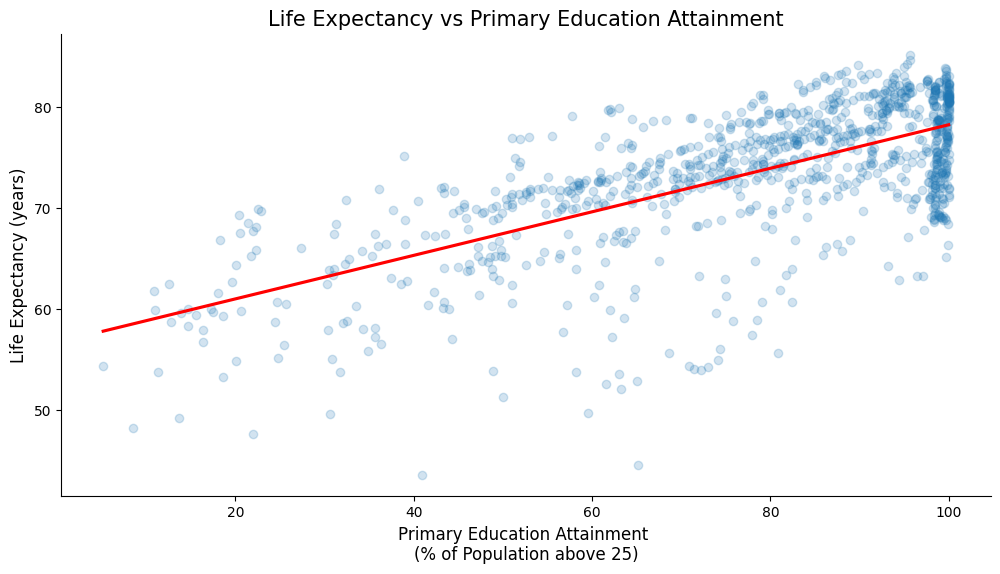

In [17]:
#Life Expectancy vs Primary Education Attainment
plt.subplots(figsize=(12,6))
sns.regplot(x='Primary_Education_Attainment_Percent', y='Life_Expectancy', data=data, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'}, ci=None)

plt.title("Life Expectancy vs Primary Education Attainment",fontsize=15)
plt.ylabel("Life Expectancy (years)",fontsize=12)
plt.xlabel("Primary Education Attainment \n(% of Population above 25)",fontsize=12)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

plt.savefig('exp_edu.svg', format='svg')

In [18]:
#Regression Analysis: Life Expectancy and Primary Education Attainment

#Model examining relationship between Life Expectancy and Primary Education Attainment
model = 'Life_Expectancy ~ Primary_Education_Attainment_Percent'
result = smf.ols(model, data=data).fit()

#As obtained p-value less than 0.05, we can conclude a statistically significant relationship
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     819.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          8.72e-132
Time:                        05:42:36   Log-Likelihood:                -3032.4
No. Observations:                 990   AIC:                             6069.
Df Residuals:                     988   BIC:                             6079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


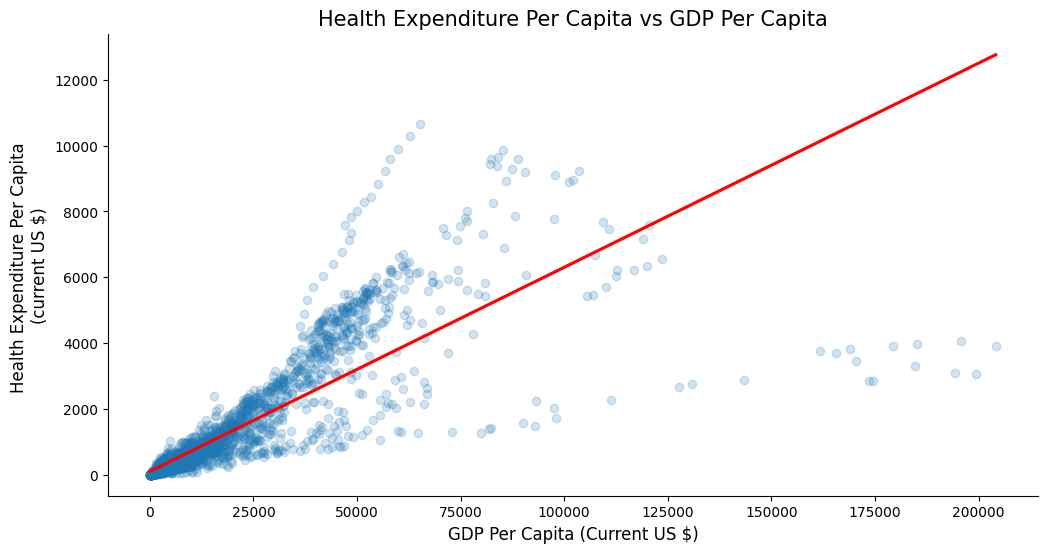

In [19]:
#Health Expenditure Per Capita vs GDP Per Capita
plt.subplots(figsize=(12,6))
sns.regplot(x='GDP_Per_Capita', y='Health_Expend_Per_Capita', data=data, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'}, ci=None)

plt.title("Health Expenditure Per Capita vs GDP Per Capita",fontsize=15)
plt.ylabel("Health Expenditure Per Capita \n(current US $)",fontsize=12)
plt.xlabel("GDP Per Capita (Current US $)",fontsize=12)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

plt.savefig('health_gdp.svg', format='svg')

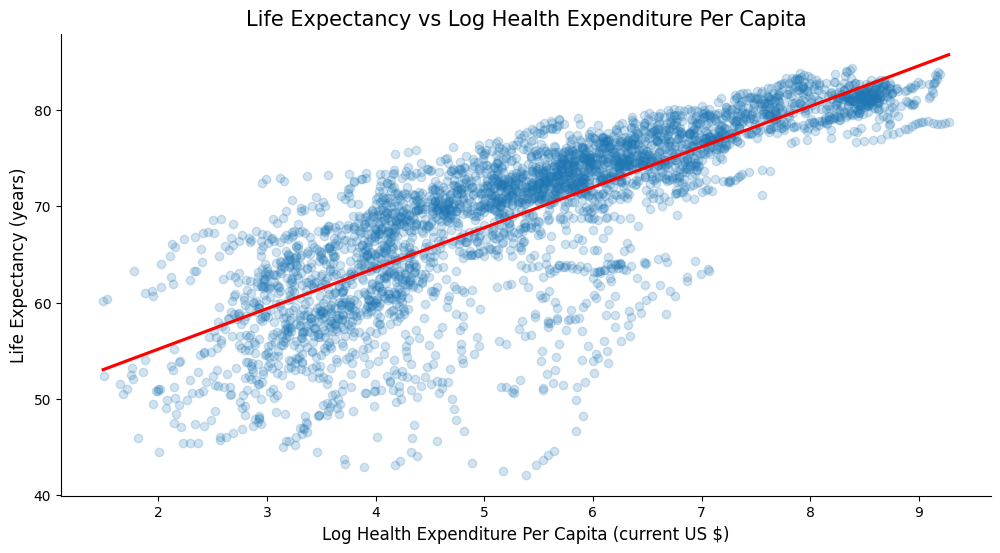

In [20]:
#Life Expectancy vs Log Healthcare Expenditure Per Capita
#We make use of Log to avoid clustering of data which results due to Healthcare Expenditure Per Capita numbers being considerably larger
#compared to Life Expectancy
plt.subplots(figsize=(12,6))
data['Log_Health_Expend_Per_Capita'] = np.log(data['Health_Expend_Per_Capita'])
sns.regplot(x='Log_Health_Expend_Per_Capita', y='Life_Expectancy', data=data, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'}, ci=None)

plt.title("Life Expectancy vs Log Health Expenditure Per Capita",fontsize=15)
plt.ylabel("Life Expectancy (years)",fontsize=12)
plt.xlabel("Log Health Expenditure Per Capita (current US $)",fontsize=12)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

plt.savefig('exp_health.svg', format='svg')

In [21]:
#Adding on to the Life Expectancy model
#Regression Analysis: Life Expectancy and Primary Education Attainment and Log Health Expenditure Per Capita

#Model examining relationship between Life expectancy and Primary Education Attainment and Log Health Expenditure Per Capita
model = 'Life_Expectancy ~ Primary_Education_Attainment_Percent + Log_Health_Expend_Per_Capita'
result = smf.ols(model, data=data).fit()

#As obtained p-value less than 0.05, we can conclude a statistically significant relationship
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1024.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          2.14e-237
Time:                        05:42:37   Log-Likelihood:                -2640.1
No. Observations:                 949   AIC:                             5286.
Df Residuals:                     946   BIC:                             5301.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
